##### Name: **Varsha Gunturu** #####
##### Student ID: **220076** #####
##### Course Name: **Machine Learning** #####
##### Course ID: **BUAN302** #####
##### Professor: **Minati Rath** #####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, silhouette_score, davies_bouldin_score, adjusted_rand_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew


In [2]:
url = '/Users/gunturuvarsha/Downloads/Under Graduation Course Materials/UG3/Sem_5/BUAN302 Machine Learning/Individual Project/Dry_Bean_Dataset[1].xlsx'
Dry_Bean_DataSet = pd.read_excel(url, header=0)
print("First few rows of the dataset\n:")
print(Dry_Bean_DataSet.head(2))
print("\n\n\nData Description for more clarity:\n")
print(Dry_Bean_DataSet.describe())
print(Dry_Bean_DataSet.info())

First few rows of the dataset
:
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  



Data Description for more clarity:

                Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214

## About the Dataset
The dataset consists of `13,611` entries with `17` columns, including `16` features and `1` class label. The features primarily represent geometric properties of dry beans, such as area, perimeter, and various shape factors. The target variable is the class of the beans.  
There are no missing values in the dataset.  
Since there is a class, we can use supervised and unsupervised learning for this dataset. Namely SVM, Decision Tree Classifier, Random Forest Classifier, logistic regression, K-nearest neighbour and K-means clustering.
Therefore, I will be start with **SVM** and **decision trees**  due to their strong performance metrics. Then will use **K-Means** clustering.

Class distribution:
 DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


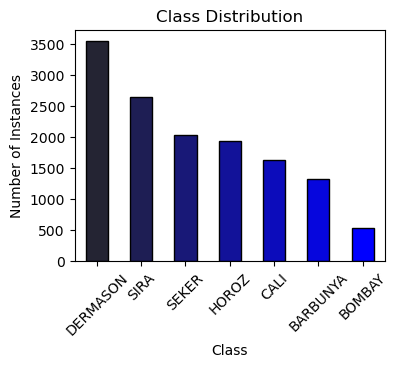

In [3]:
#Class Distribution

class_counts = Dry_Bean_DataSet['Class'].value_counts()
print("Class distribution:\n", class_counts)

custom_palette = sns.dark_palette("blue", n_colors=len(class_counts)) #colour based on count
class_counts.plot(kind='bar', figsize=(4, 3), color=custom_palette, edgecolor='black')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)
plt.show()

### Observations
- The Dermason and Sira class is the most prevalent, comprising a substantial portion of the dataset. This may lead to model bias towards this class during training.
- The Bombay class is significantly underrepresented, which could affect the model's ability to learn features associated with this class effectively.
- This might require techniques like **oversampling**, SMOTE handling during model training.

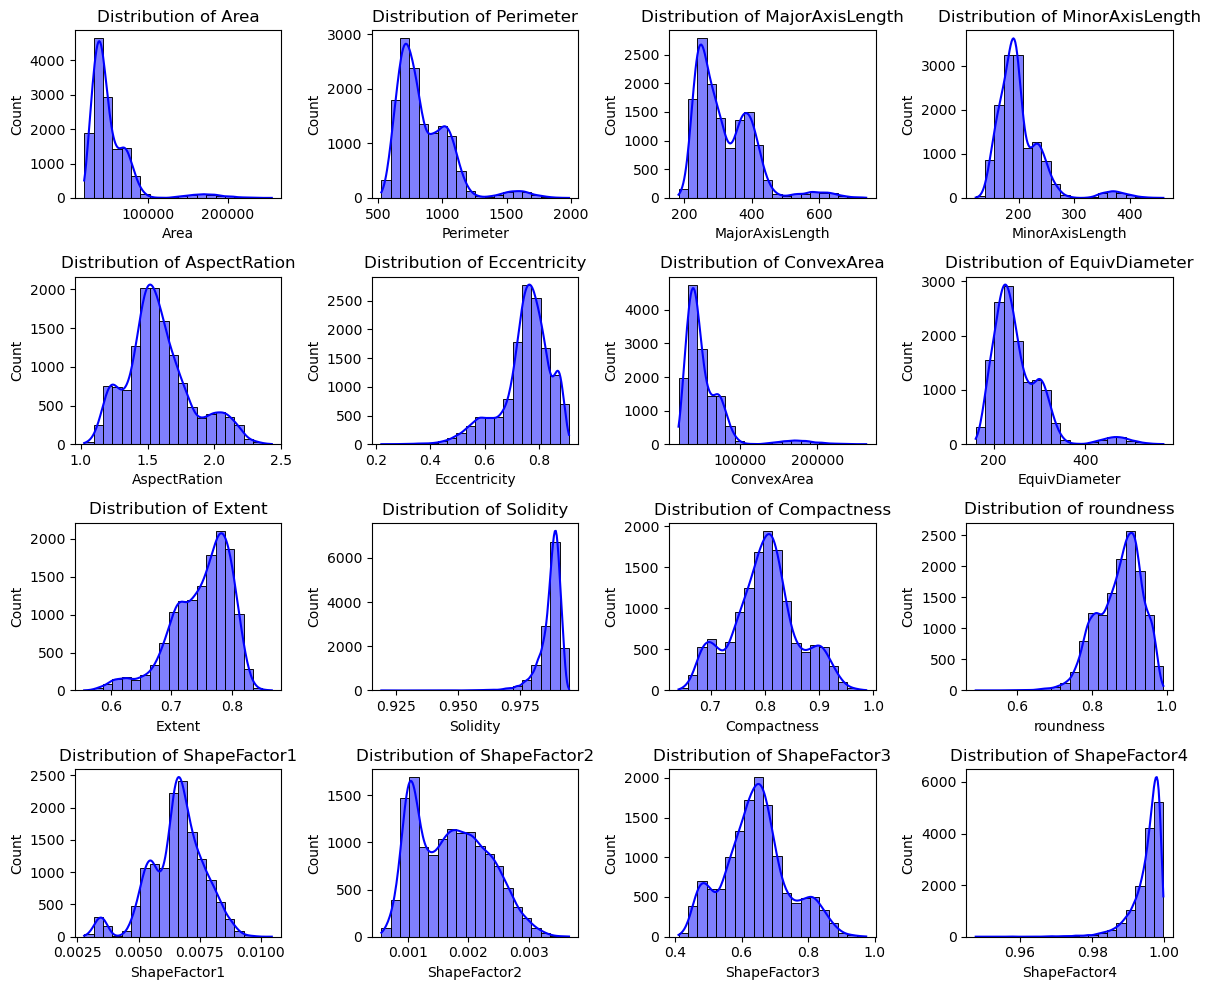

Skewness for all features except 'Class':
Area               2.952606
Perimeter          1.625944
MajorAxisLength    1.357666
MinorAxisLength    2.237964
AspectRation       0.582509
Eccentricity      -1.062707
ConvexArea         2.941497
EquivDiameter      1.948743
Extent            -0.895250
Solidity          -2.549812
roundness         -0.635679
Compactness        0.037111
ShapeFactor1      -0.534082
ShapeFactor2       0.301193
ShapeFactor3       0.242454
ShapeFactor4      -2.759179
dtype: float64


In [4]:
# Creating a grid of subplots
plt.figure(figsize=(12, 10))

# List of features to visualize
features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 
            'Eccentricity', 'ConvexArea','EquivDiameter','Extent','Solidity', 'Compactness', 'roundness', 'ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']


# Iterate through features and plot
#less lines of code as a loop is implemented for each featire
for i, feature in enumerate(features, 1):
    plt.subplot(4, 4, i)  # Adjust rows and columns as needed (4x4 grid)
    sns.histplot(Dry_Bean_DataSet[feature], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {feature}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

skewness_values = Dry_Bean_DataSet.drop('Class', axis=1).apply(skew)
print("Skewness for all features except 'Class':")
print(skewness_values)

### Skewness Analysis of Features (Excluding `Class`)

The skewness of features was analyzed to determine the need for transformations. Skewness indicates whether a feature's distribution is symmetric or has a long tail. Below are the results of the analysis:



#### 1. Features with High Positive Skewness (Skewness > 1)

These features are **right-skewed**, indicating a long tail of higher values. Transformation techniques like **log transformation**, **square root transformation**, or **Box-Cox** can normalize these distributions.

| **Feature**         | **Skewness** | **Analysis**                                                                 |
|----------------------|--------------|-------------------------------------------------------------------------------|
| **Area**            | 2.95         | Extremely skewed, many small values relative to a few large ones.            |
| **Perimeter**       | 1.63         | Moderately skewed, similar distribution to `Area`.                           |
| **MajorAxisLength** | 1.36         | Moderately skewed, large values dominate.                                    |
| **MinorAxisLength** | 2.24         | Highly skewed, transformation is recommended.                                |
| **ConvexArea**      | 2.94         | Mirrors `Area`, skewed due to outliers or extreme values.                    |
| **EquivDiameter**   | 1.95         | High skewness, transformation can improve normality.                         |



#### 2. Features with High Negative Skewness (Skewness < -1)

These features are **left-skewed**, indicating a long tail of smaller values. Transformations like **reflection + log transformation** or **Yeo-Johnson transformation** can help.

| **Feature**    | **Skewness** | **Analysis**                                                                 |
|-----------------|--------------|-------------------------------------------------------------------------------|
| **Eccentricity**| -1.06        | Negatively skewed, data is clustered near higher values.                    |
| **Solidity**    | -2.55        | Highly left-skewed, values are concentrated near 1.                         |
| **ShapeFactor4**| -2.76        | Very skewed; strong transformation is required to normalize.                |



#### 3. Features with Moderate Skewness (0.5 < |Skewness| < 1)

These features are moderately skewed. Depending on the modeling approach, transformation may or may not be necessary.

| **Feature**       | **Skewness** | **Analysis**                                                                 |
|--------------------|--------------|-------------------------------------------------------------------------------|
| **AspectRation**  | 0.58         | Slightly skewed; transformation is optional.                                |
| **Extent**        | -0.89        | Moderately skewed to the left, normalization might help.                    |
| **roundness**     | -0.63        | Slight negative skew, transformation is optional.                          |



#### 4. Features with Low Skewness (|Skewness| < 0.5)

These features are close to symmetric and do not require transformation.

| **Feature**        | **Skewness** | **Analysis**                                           |
|---------------------|--------------|-------------------------------------------------------|
| **Compactness**    | 0.04         | Nearly symmetric, no transformation needed.          |
| **ShapeFactor1**   | -0.53        | Slight skew, unlikely to affect modeling.            |
| **ShapeFactor2**   | 0.30         | Slight skew, no transformation needed.               |
| **ShapeFactor3**   | 0.24         | Nearly symmetric, no transformation needed.          |

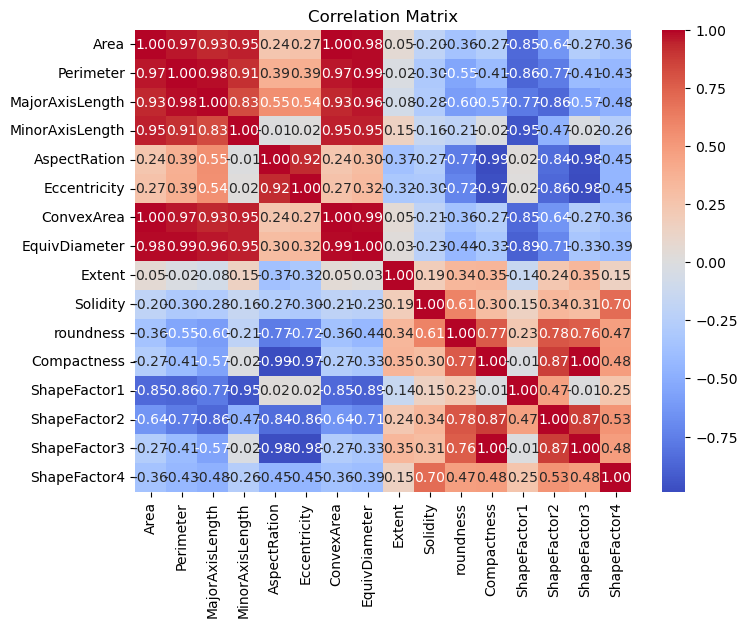

In [5]:
#Correlation Matrix for feature relationships
correlation_matrix = Dry_Bean_DataSet.drop('Class', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Insights ###
Features that exhibit high correlation (e.g., above 0.8) may be redundant and can be candidates for removal during feature selection. This step is crucial as it helps to reduce dimensionality, enhance model performance, and prevent multicollinearity issues.
- Strongly Correlated Features (High Positive Correlation): 
    - `Area`, `Perimeter`, `ConvexArea`, and `EquivDiameter`. These features show a very high correlation (close to 1). This is expected since these measurements are related geometrically. Including all these features might introduce redundancy.
    - `ShapeFactor1`, `ShapeFactor2`, and `ShapeFactor3`: These features also have high mutual correlation (e.g., ShapeFactor2 and ShapeFactor3 > 0.8). Similar to the above, redundancy might exist.
    - Since these features are highly redundant, indicating that one of them could represent the group effectively without losing much information.
- Weakly or Negatively Correlated Features:
    - Features like `Extent`, `Solidity`, and `Roundness` have weak or **moderate** correlation with most others. These features might capture unique aspects of the data that are less related to others, making them potentially valuable for distinguishing classes.

### Feature Selection and Correlation Analysis
- Features like Area, Perimeter, ConvexArea, and EquivDiameter are highly correlated (correlation > 0.8), which indicates redundancy. This redundancy can negatively impact models sensitive to multicollinearity like distance-based models (e.g., KNN, K-Means).
- Similarly, ShapeFactor1, ShapeFactor2, and ShapeFactor3 are strongly correlated. Retaining all of these could inflate feature importance inaccurately.
- Dimensionality reduction with PCA is appropriate here since it preserves variance while eliminating redundancy. 
**Therefore, I will first remove outliers, handle skewness, balance classes using SMOTE, scale the features and then implement PCA for dimentionality reduction.**  
Outliers impact transformations, and they are generally easy to detect in original scale.
But first class imbalance can also influence outliers and outliers removal. Therefore, SMOTE will be applied to balance the datatset after removing outliers.

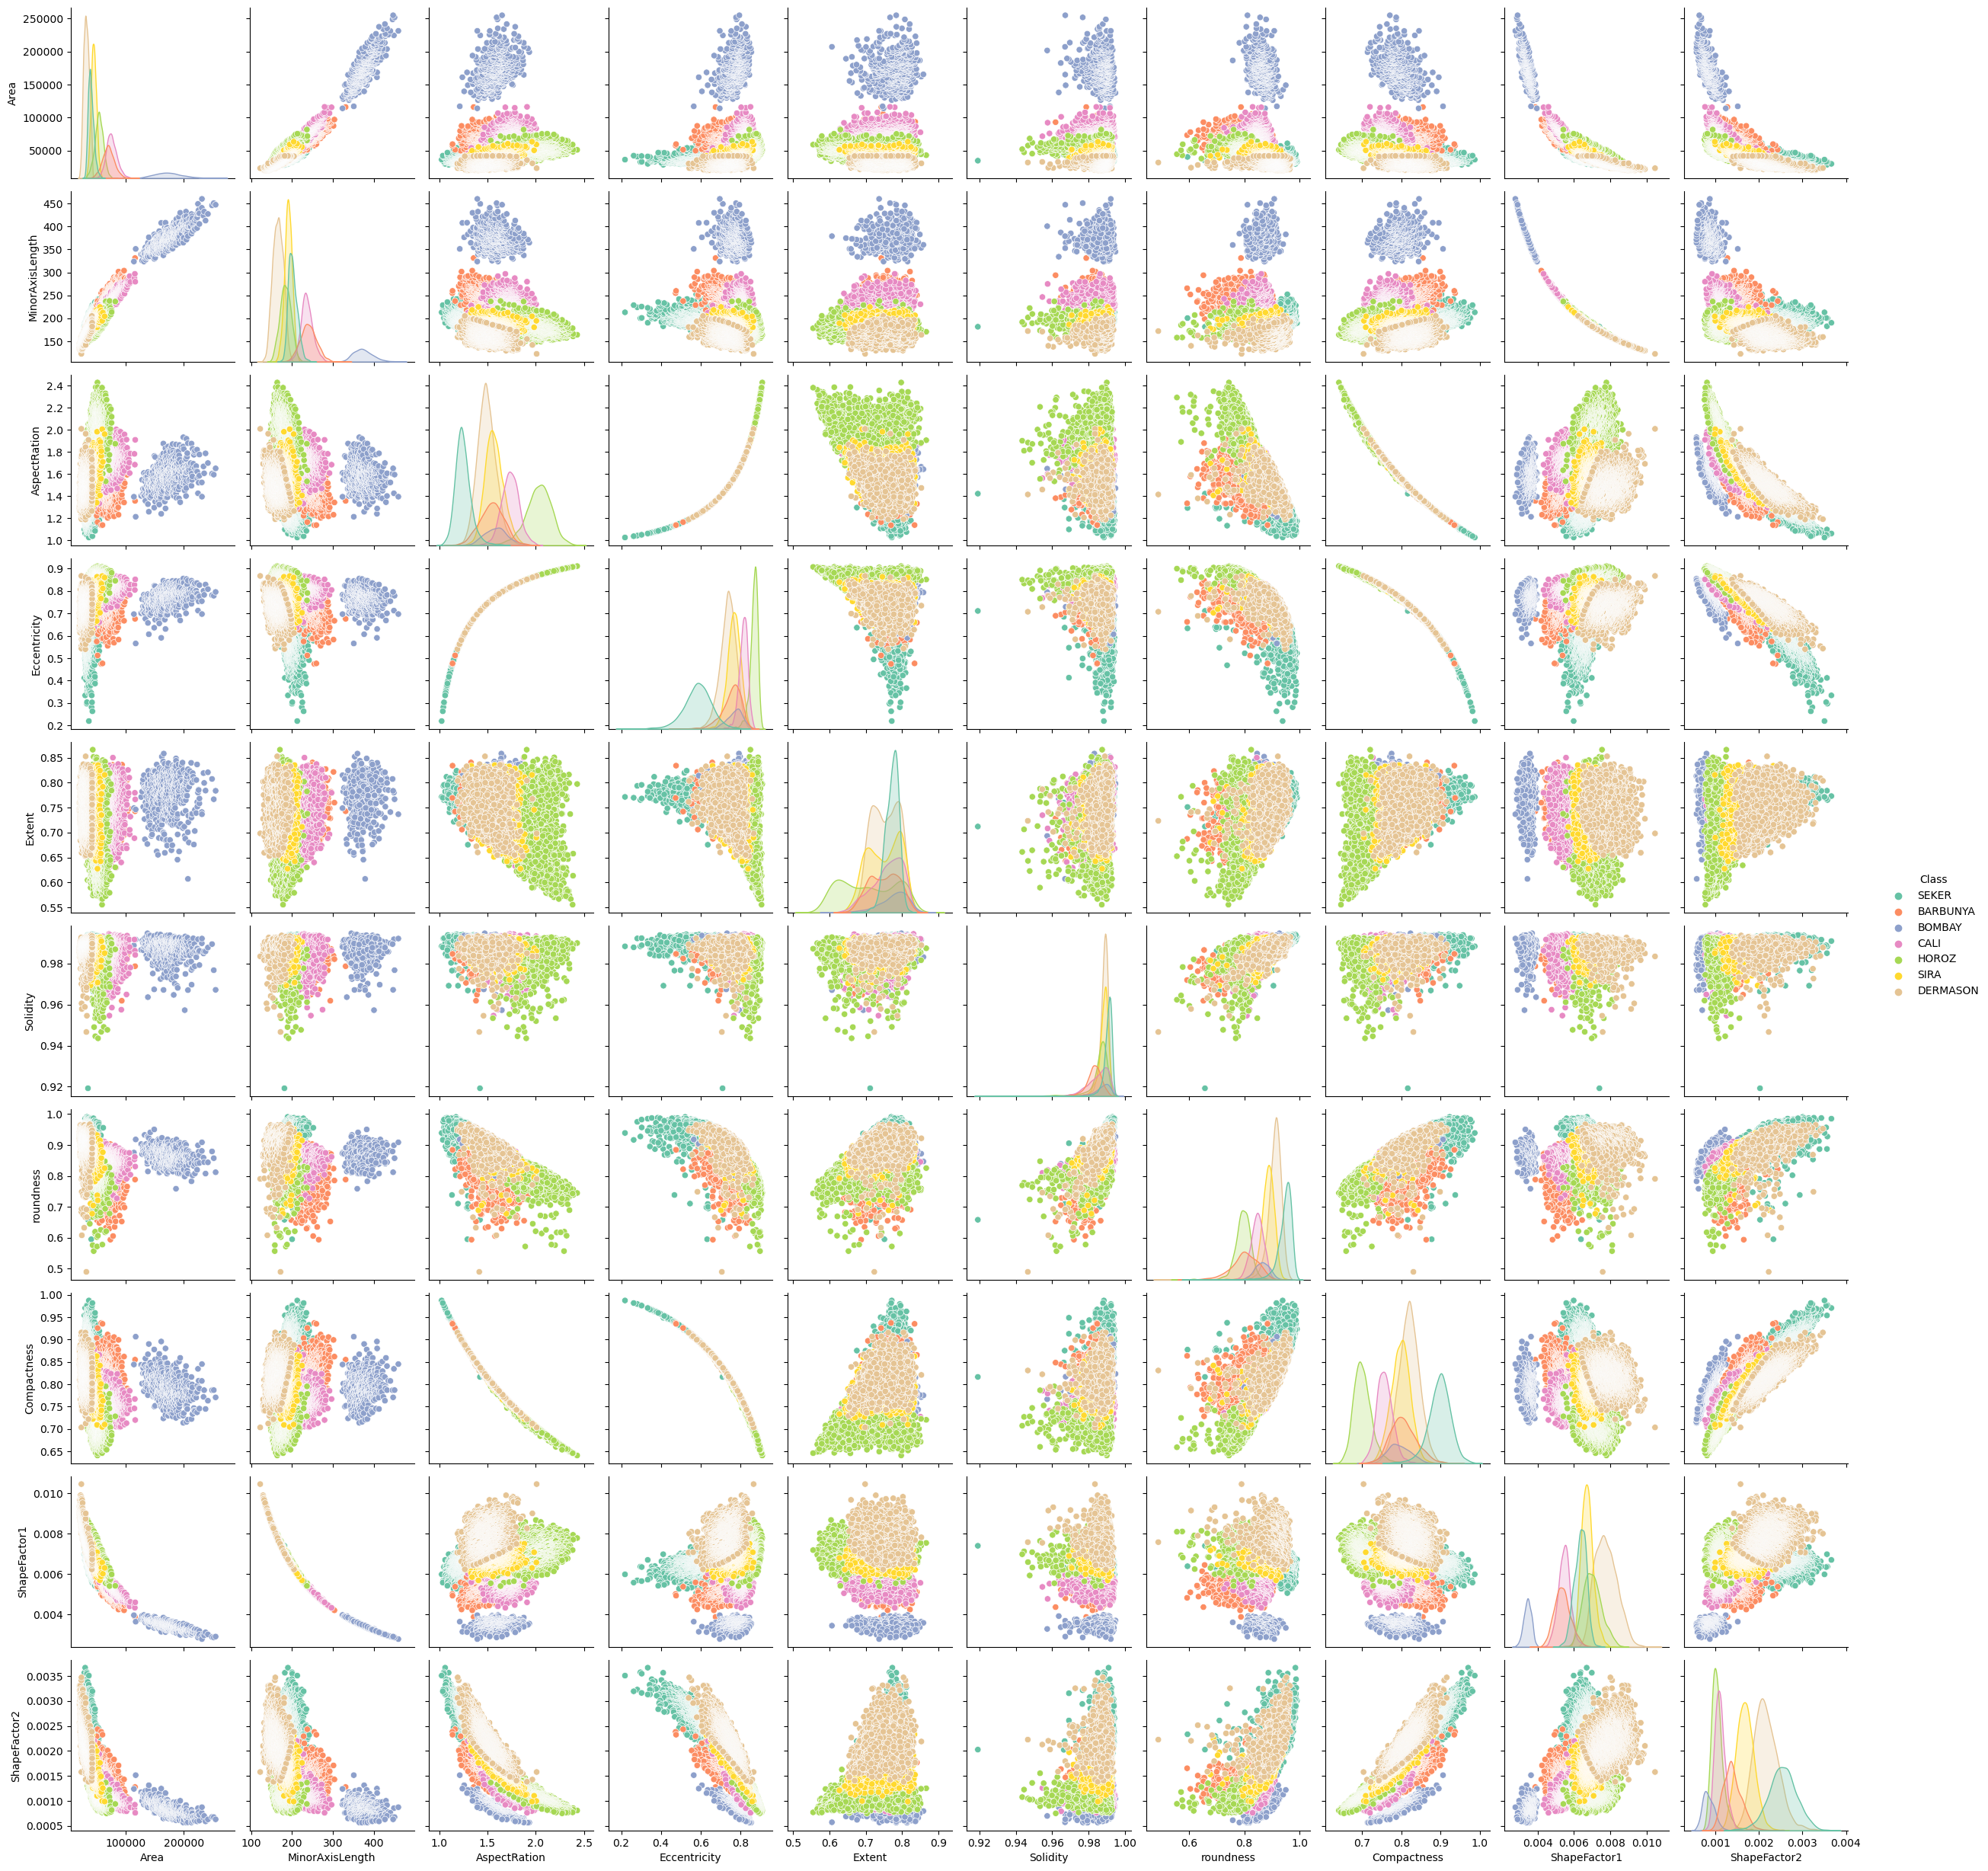

In [6]:
#sns.pairplot(Dry_Bean_DataSet)
#plt.show()

# Specify the columns to exclude
columns_to_exclude = ['Perimeter','ConvexArea','EquivDiameter','MajorAxisLength','ShapeFactor4','ShapeFactor3',]  # Removing Redudant columns

# Create a new DataFrame excluding the specified columns
selected_features = Dry_Bean_DataSet.drop(columns=columns_to_exclude)

# Generate the pairplot using the remaining features
sns.pairplot(selected_features, hue='Class', diag_kind='kde', palette='Set2')  # 'Class' is used as hue for coloring

# Display the plot
plt.show()

### Pair Plot Analysis Summary
1. **Diagonal (KDE Plots)**:
   - Each diagonal plot represents the Kernel Density Estimation (KDE) for individual features.
   - KDE peaks indicate regions with higher data density.
   - Classes show varying densities, suggesting feature-specific clustering.

2. **Feature Correlations**:
   - Several features show strong linear or non-linear correlations.
   - Correlations differ across classes, hinting at class-specific relationships.

3. **Class Separation**:
   - Certain feature combinations reveal clear class separability.
   - Overlap exists for some features, indicating potential challenges in classification.

4. **Outliers**:
   - Sparse points outside dense regions suggest outliers or rare cases for specific classes.

5. **Cluster Formation**:
   - Distinct clusters are visible for certain class-feature pairs.
   - Indicates possible suitability for clustering algorithms or dimensionality reduction.

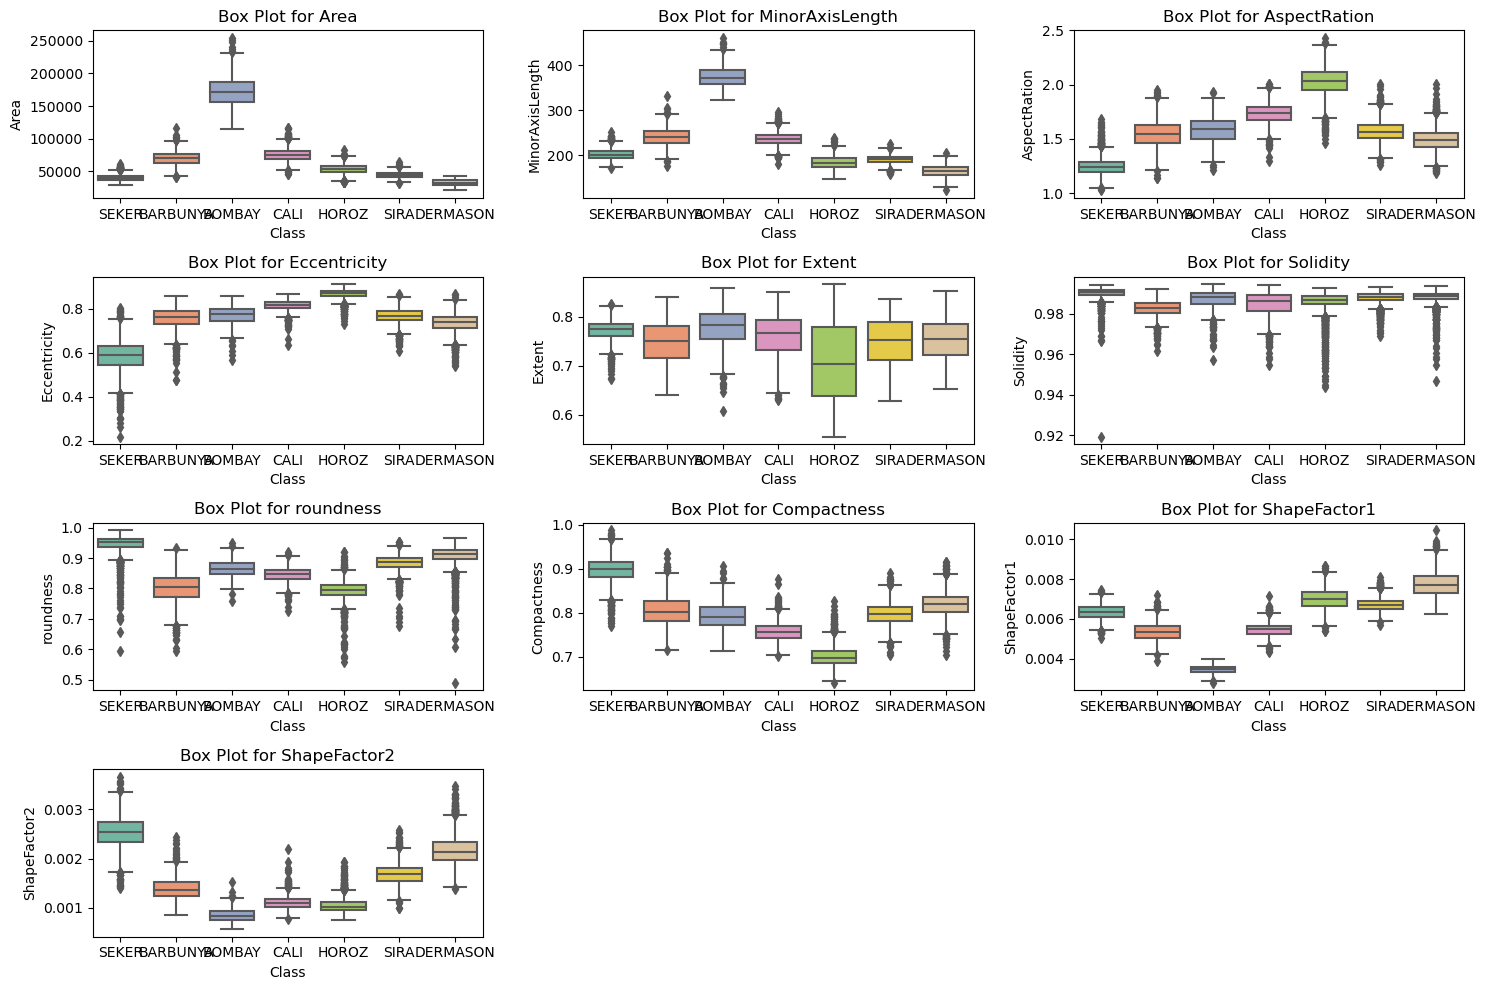

In [7]:
boxplot_features = selected_features.columns.drop('Class')  # Exclude 'Class' since it's categorical

# Create a figure for the box plots
plt.figure(figsize=(15, 10))

# Generate box plots for each feature
for i, feature in enumerate(boxplot_features, 1):
    plt.subplot(4, 3, i)  # Adjust rows and columns as needed (e.g., 4x4 grid)
    sns.boxplot(data=selected_features, x='Class', y=feature, palette='Set2')
    plt.title(f'Box Plot for {feature}')
    plt.xlabel('Class')
    plt.ylabel(feature)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


The box plot shows the spread of the data and the outliers. We can see that there is a lot of ouliers for each features. These outliers can disproportionately influence models, particularly those sensitive to extreme values like K-means. Removing or managing outliers ensures the model learns from the majority of the data, leading to better generalization. Removing outliers also enhances data quality and prevents skewed metrics.

In [8]:
# Feature Engineering (Creating new features)
Dry_Bean_DataSet['Shape_Complexity'] = Dry_Bean_DataSet['ShapeFactor1'] * Dry_Bean_DataSet['Compactness']
Dry_Bean_DataSet['Shape_Regularity'] = Dry_Bean_DataSet['Solidity'] * Dry_Bean_DataSet['roundness']

# Encoding Target Variable
le = LabelEncoder()
Dry_Bean_DataSet['Class'] = le.fit_transform(Dry_Bean_DataSet['Class'])

# Feature-Target Split
X = Dry_Bean_DataSet.drop('Class', axis=1)
y = Dry_Bean_DataSet['Class']

# Convert X to float64 to prevent overflow warnings
X = X.astype(np.float64)

# Group data by 'Class' and compute IQR-based outlier removal for each feature within each class
grouped = Dry_Bean_DataSet.groupby('Class')

# Initialize an empty DataFrame to store the cleaned data
cleaned_data = pd.DataFrame()

# Iterate through each class group
for class_label, group in grouped:
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1

    # Compute the condition for outliers within this class group
    outliers_condition = (group < (Q1 - 1.5 * IQR)) | (group > (Q3 + 1.5 * IQR))
    
    # Retain only the rows that are not outliers
    class_cleaned_data = group[~outliers_condition.any(axis=1)]
    
    # Append the cleaned data to the final DataFrame
    cleaned_data = pd.concat([cleaned_data, class_cleaned_data])

# Reset index after concatenation
Dry_Bean_DataSet_clean = cleaned_data.reset_index(drop=True)

# Update X and y after removing outliers
X = Dry_Bean_DataSet_clean.drop('Class', axis=1)
y = Dry_Bean_DataSet_clean['Class']

# Check for Missing Values
print("Missing Values:\n", Dry_Bean_DataSet_clean.isnull().sum())


# Handle Skewness
skewness = X.apply(lambda x: x.skew())
print(f"Skewness of features:\n{skewness}")

# Applying log transformation for features with positive skewness
positive_skewed_features = skewness[skewness > 1].index.tolist()
X[positive_skewed_features] = X[positive_skewed_features].apply(lambda x: np.log1p(x))

# Applying Yeo-Johnson transformation for features with negative skewness
negative_skewed_features = skewness[skewness < -1].index.tolist()
pt = PowerTransformer(method='yeo-johnson', standardize=True)
X[negative_skewed_features] = pt.fit_transform(X[negative_skewed_features])

# Check the skewness after transformation
transformed_skewness = X.apply(lambda x: x.skew())
print(f"Skewness after transformation:\n{transformed_skewness}")

# Balancing Classes using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Feature Scaling (Standardization and Normalization)
scaler_standard = StandardScaler()
X_resampled_standardized = scaler_standard.fit_transform(X_resampled)

#scaler_normalizer = MinMaxScaler()
#X_resampled_normalized = scaler_normalizer.fit_transform(X_resampled)

# Dimensionality Reduction using PCA (Retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_resampled_standardized)

print(f"Original Shape: {X_resampled_standardized.shape}, PCA Reduced Shape: {X_pca.shape}")

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Define K-Fold cross-validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


rf = RandomForestClassifier()
rf.fit(X_resampled_standardized, y_resampled)
feature_importance = rf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
print(importance_df)

Missing Values:
 Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
EquivDiameter       0
Extent              0
Solidity            0
roundness           0
Compactness         0
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
Class               0
Shape_Complexity    0
Shape_Regularity    0
dtype: int64
Skewness of features:
Area                2.892666
Perimeter           1.601316
MajorAxisLength     1.316257
MinorAxisLength     2.248223
AspectRation        0.624804
Eccentricity       -0.961640
ConvexArea          2.879085
EquivDiameter       1.927096
Extent             -0.931290
Solidity           -1.292997
roundness          -0.465381
Compactness        -0.005506
ShapeFactor1       -0.583054
ShapeFactor2        0.261937
ShapeFactor3        0.199449
ShapeFactor4       -1.524355
Shape_Complexity   -0.412170
Shape_Regularity   -0.451411
dtype: f

/Users/gunturuvarsha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/gunturuvarsha/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:244: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Original Shape: (22001, 18), PCA Reduced Shape: (22001, 4)
             Feature  Importance
1          Perimeter    0.101038
14      ShapeFactor3    0.095790
5       Eccentricity    0.086497
4       AspectRation    0.085650
2    MajorAxisLength    0.074275
11       Compactness    0.074237
12      ShapeFactor1    0.060887
3    MinorAxisLength    0.059598
7      EquivDiameter    0.058874
16  Shape_Complexity    0.053444
0               Area    0.052610
6         ConvexArea    0.047494
10         roundness    0.041807
13      ShapeFactor2    0.034595
15      ShapeFactor4    0.029040
17  Shape_Regularity    0.027744
9           Solidity    0.011351
8             Extent    0.005069


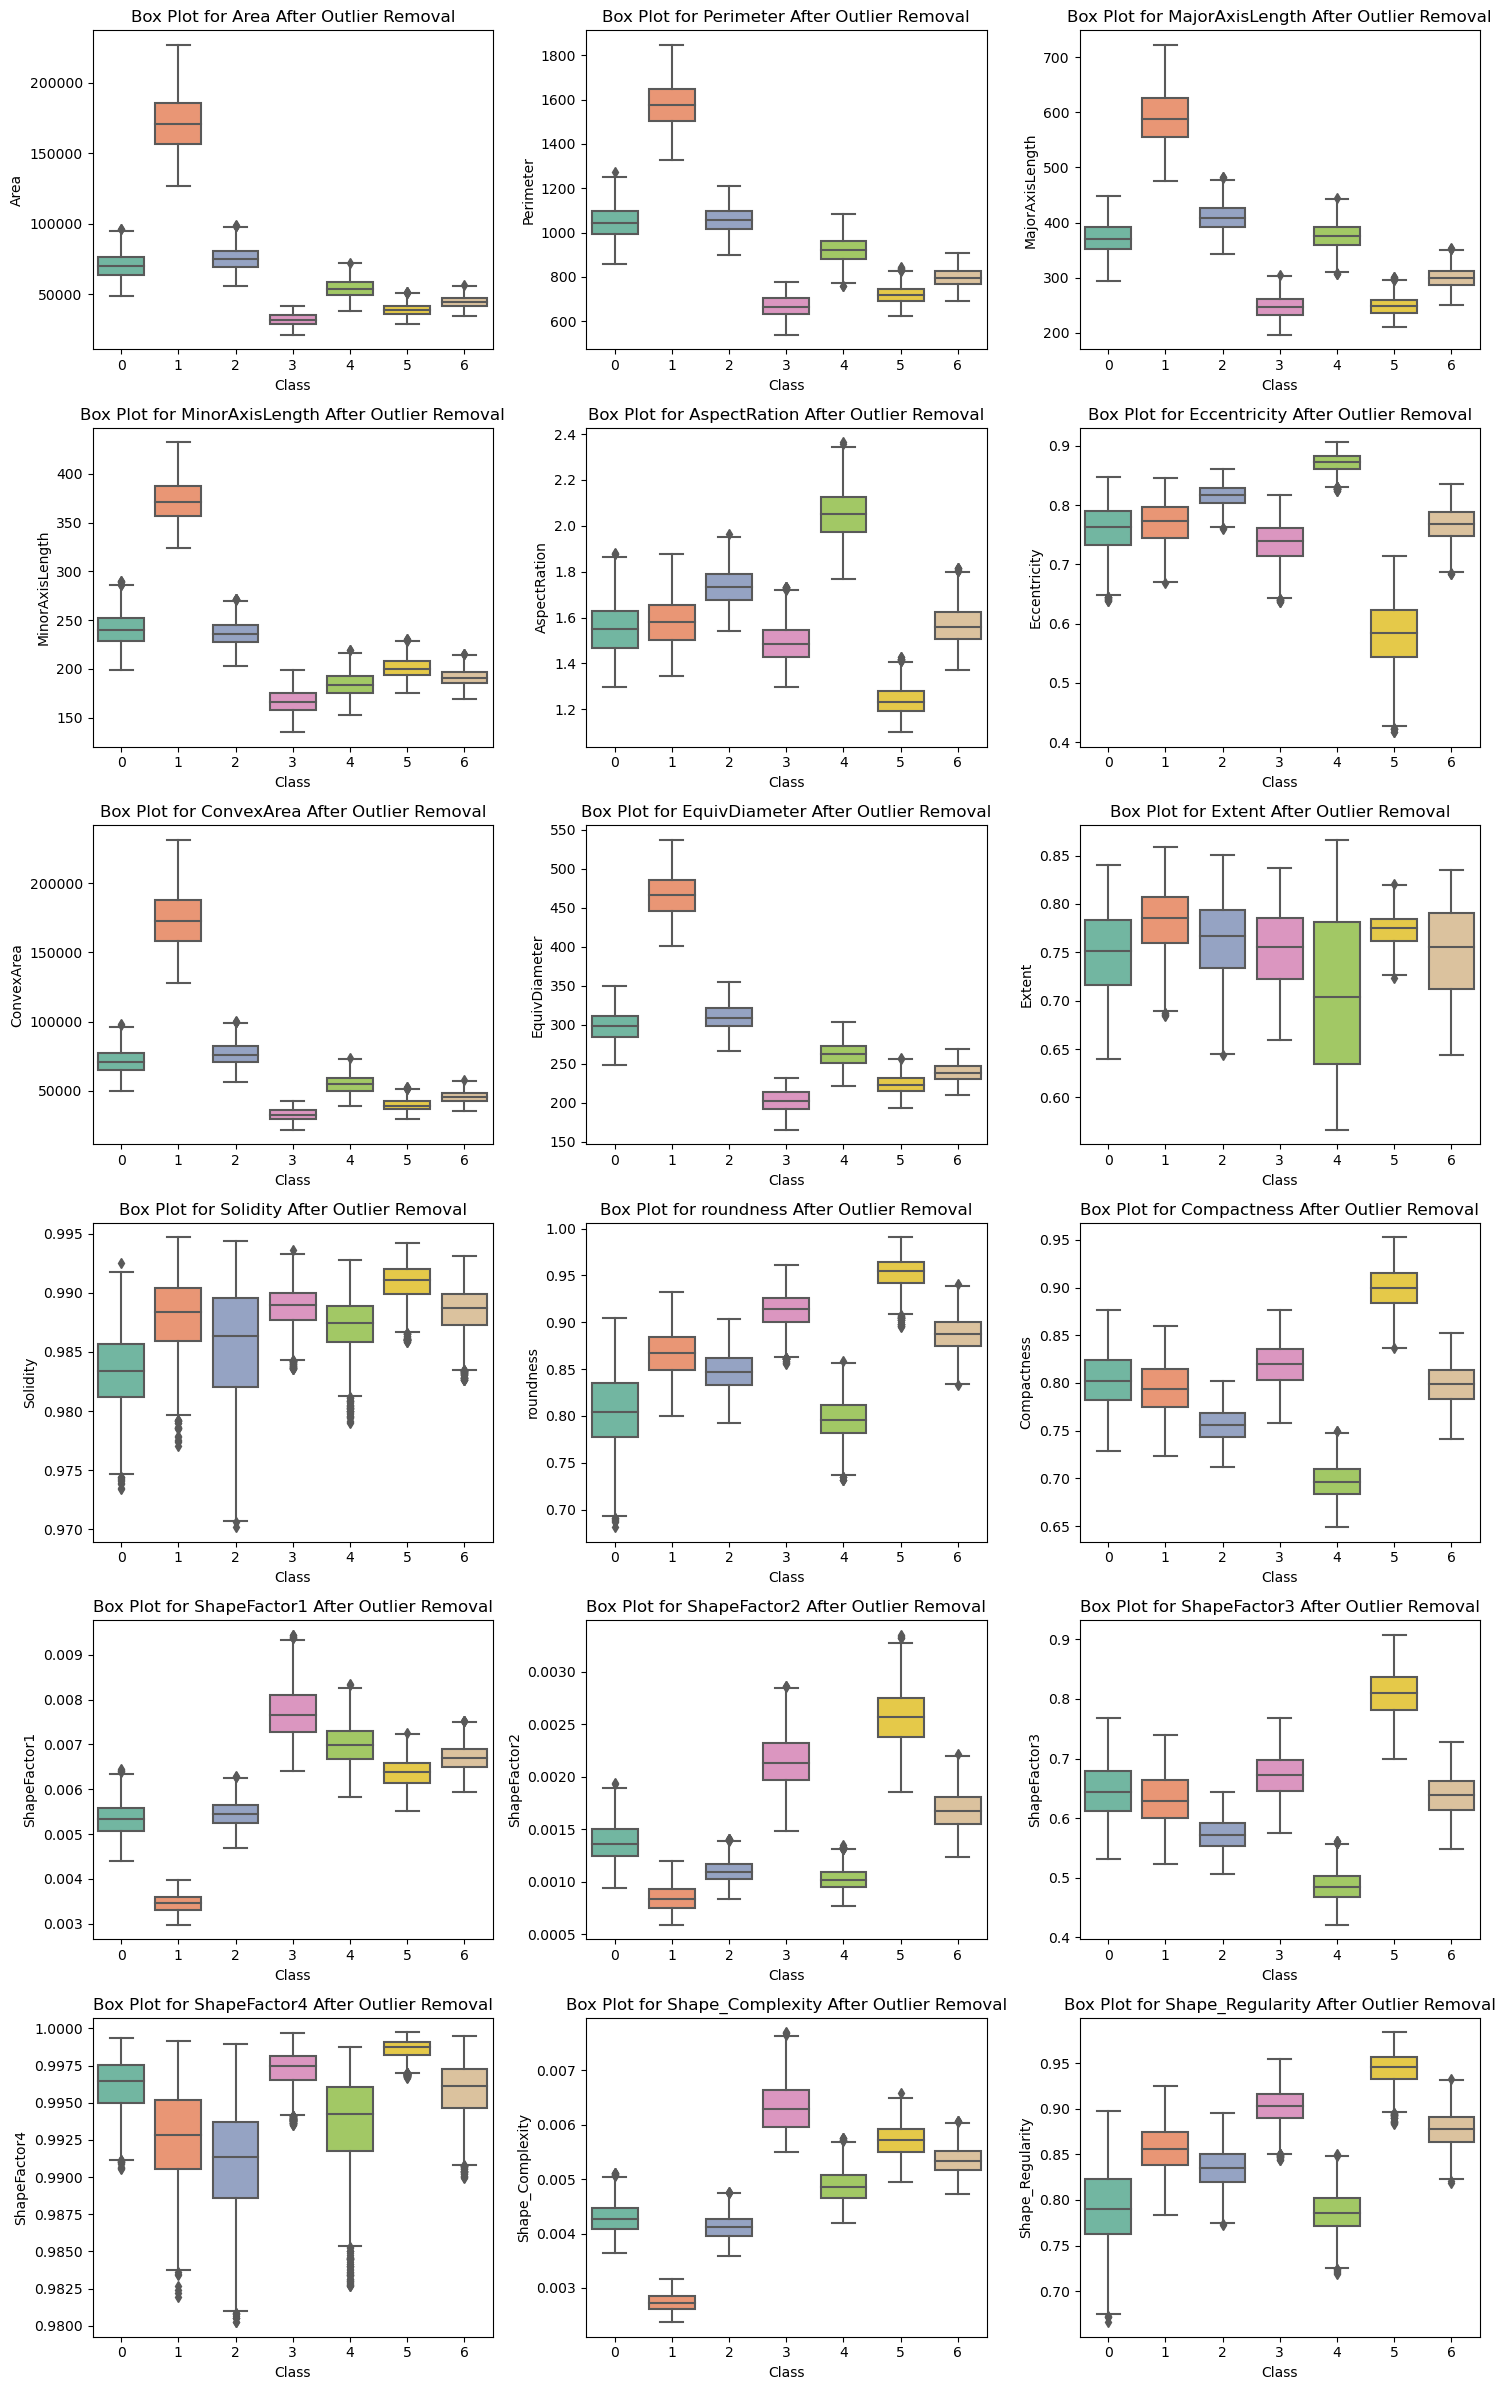

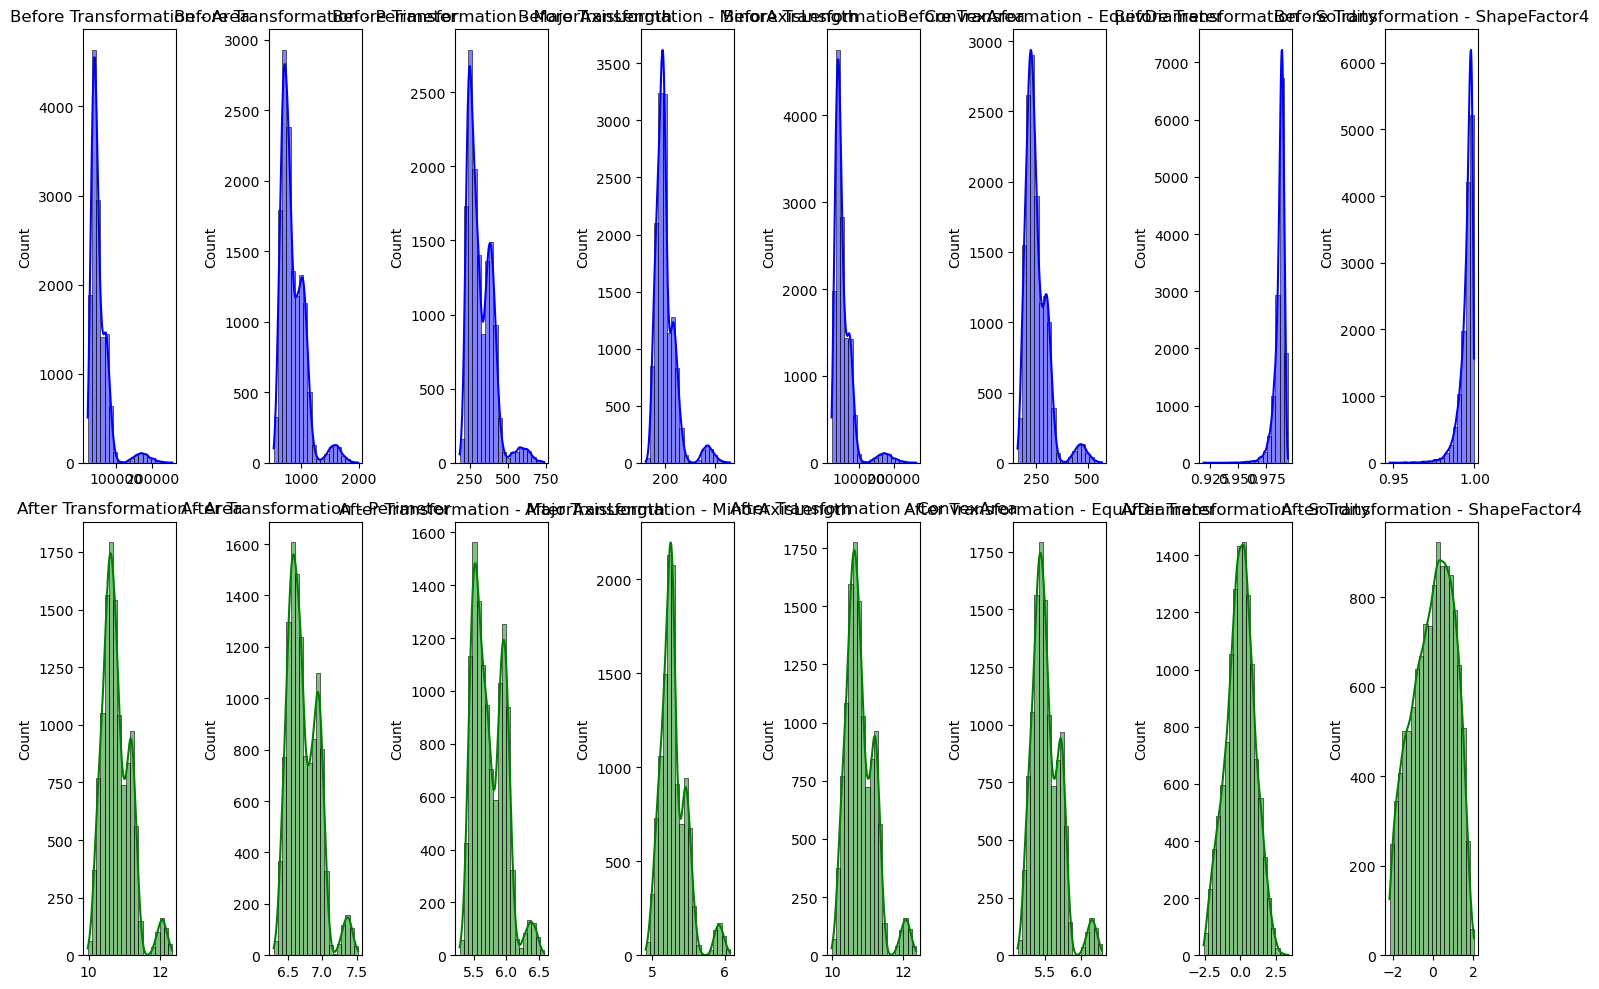

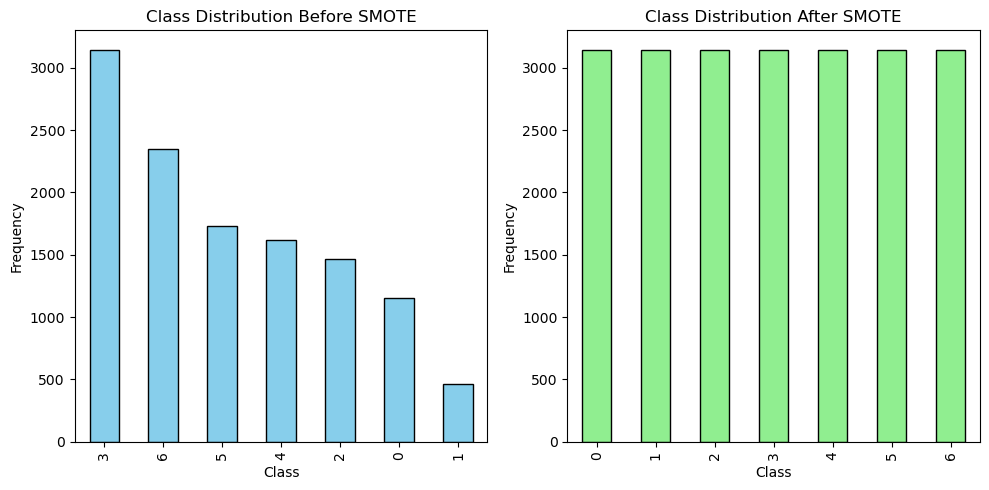

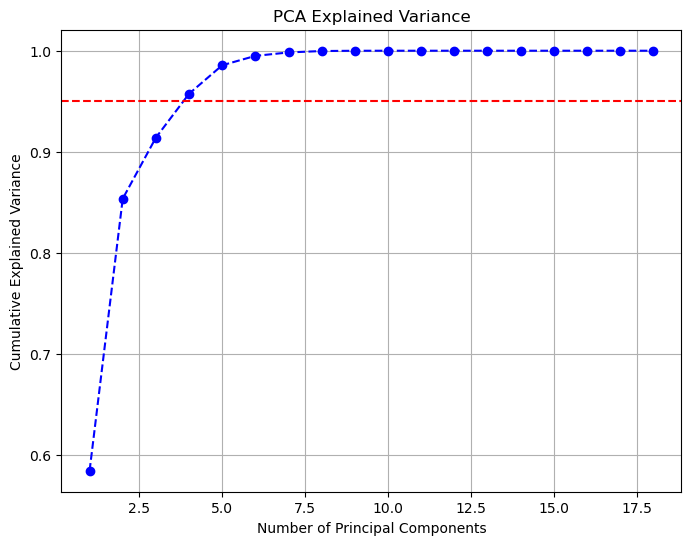

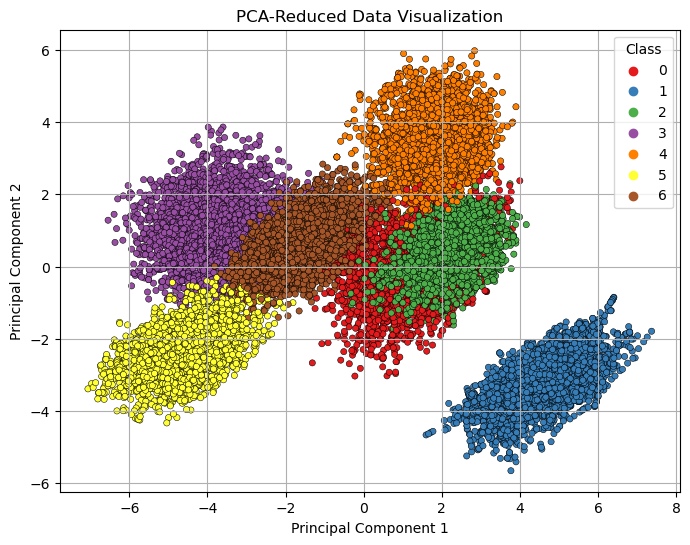

In [15]:
import math

# Exclude 'Class' column from features
boxplot_features = X.columns  # Use the cleaned feature set `X` (features only)

# Determine the number of rows and columns dynamically
num_features = len(boxplot_features)
cols = 3  # Number of columns for subplots
rows = math.ceil(num_features / cols)  # Calculate rows needed based on features

# Create a figure for the box plots
plt.figure(figsize=(5 * cols, 4 * rows))

# Generate box plots for each feature
for i, feature in enumerate(boxplot_features, 1):
    plt.subplot(rows, cols, i)  # Dynamically set rows and columns
    sns.boxplot(data=Dry_Bean_DataSet_clean, x='Class', y=feature, palette='Set2')
    plt.title(f'Box Plot for {feature} After Outlier Removal')
    plt.xlabel('Class')
    plt.ylabel(feature)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#checking whether the features skewdness has been normalised 
features_skewed = positive_skewed_features + negative_skewed_features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_skewed, 1):
    plt.subplot(2, len(features_skewed), i)
    sns.histplot(Dry_Bean_DataSet[feature], kde=True, bins=20, color='blue')
    plt.title(f'Before Transformation - {feature}')
    plt.xlabel('')
    
    plt.subplot(2, len(features_skewed), i + len(features_skewed))
    sns.histplot(X[feature], kde=True, bins=20, color='green')
    plt.title(f'After Transformation - {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

# Class Distribution before and after SMOTE
plt.figure(figsize=(10, 5))

# Before SMOTE
plt.subplot(1, 2, 1)
Dry_Bean_DataSet_clean['Class'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')

# After SMOTE
plt.subplot(1, 2, 2)
pd.Series(y_resampled).value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Explained Variance Plot
pca_full = PCA().fit(X_resampled_standardized)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='--')  # Line for 95% variance
plt.title('PCA Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Scatter Plot for PCA-Reduced Data
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled, palette='Set1', s=20, edgecolor='k')
plt.title('PCA-Reduced Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='best')
plt.grid()
plt.show()

#### **Feature Engineering**:
- **Shape_Complexity**: Created by multiplying `ShapeFactor1` and `Compactness`. Represents the complexity of the bean's shape.
- **Shape_Regularity**: Created by multiplying `Solidity` and `roundness`. Captures the regularity of the bean’s shape.

These features help in capturing additional patterns related to the shape of the beans, potentially improving model performance. The idea to combine ShapeFactor1 and compactness, and Solidity and roundness is completely on Domain Knowledge. Solidity and roundness contribute to a bean with a regular shape.

#### **Data Pre-processing**:

- **Encoding Target Variable**: The target variable `Class` is encoded using `LabelEncoder()` to convert categorical labels into numerical values for model compatibility.
  
- **Outlier Removal**: Outliers are removed using the **IQR (Interquartile Range)** method. Features with values beyond 1.5 times the IQR above or below the 25th and 75th percentiles are considered outliers and excluded.
  
- **Skewness Handling**:
Log and Yeo-Johnson transformations help in normalizing the data, ensuring that the model handles non-normal distributions efficiently
  - **Log transformation** is applied to features with **positive skewness** (`skew > 1`) to normalize the distribution.
  - **Yeo-Johnson transformation** is applied to features with **negative skewness** (`skew < -1`) to make the data more Gaussian.
This ensures the features are in a suitable form for model training, improving model accuracy and performance.

#### **Class Balancing**:
- **SMOTE (Synthetic Minority Over-sampling Technique)** is applied to balance the classes, addressing any class imbalance and ensuring the model doesn't favor the majority class.

#### **Feature Scaling**:
- **Standardization** using `StandardScaler()` is applied to scale the features to have a mean of 0 and standard deviation of 1, ensuring equal weighting in distance-based models like KNN or SVM.

#### **Dimensionality Reduction**:
- **PCA (Principal Component Analysis)** is applied to reduce dimensionality while retaining 95% of the variance in the dataset. This reduces the feature space and helps prevent overfitting.

#### **Model Training & Evaluation**:
- A **RandomForestClassifier** is used to train the model on the resampled, scaled, and PCA-transformed data.
- The **feature importance** values obtained from the RandomForestClassifier indicate the relative importance of each feature in classifying the dry beans.

#### **Feature Importance**:
The top 5 most important features, based on Random Forest, are:
- **ShapeFactor3**: 0.106
- **AspectRatio**: 0.099
- **Compactness**: 0.091
- **Eccentricity**: 0.084
- **Perimeter**: 0.068

The least important features are **Solidity**, **Extent**, and **ShapeFactor2**.

K-Fold Cross-Validation Scores: [0.93819586 0.92636364 0.93363636 0.93772727 0.93772727]
Mean CV Accuracy: 0.935
Standard Deviation of CV Accuracy: 0.004
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       628
           1       1.00      1.00      1.00       628
           2       0.90      0.84      0.87       629
           3       0.94      0.91      0.92       629
           4       1.00      0.98      0.99       629
           5       0.99      0.98      0.99       629
           6       0.85      0.94      0.90       629

    accuracy                           0.93      4401
   macro avg       0.93      0.93      0.93      4401
weighted avg       0.93      0.93      0.93      4401

SVM Test Set Accuracy: 0.933


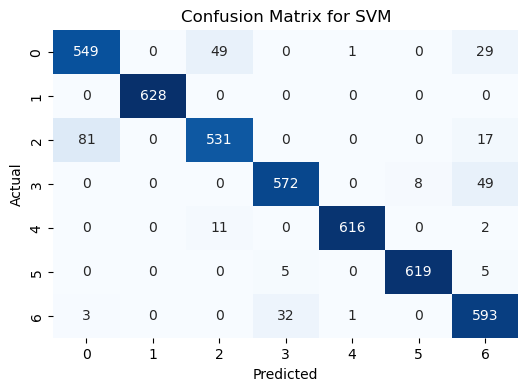

In [16]:
# Initializing the SVM Model
svm = SVC(kernel='poly', probability=True, random_state=42)

# K-Fold Cross-Validation
cv_scores = []
for train_index, test_index in kfold.split(X_pca, y_resampled):
    # Spliting the data into training and testing sets for each fold
    X_train_fold, X_test_fold = X_pca[train_index], X_pca[test_index]
    y_train_fold, y_test_fold = y_resampled[train_index], y_resampled[test_index]
    
    # Training the model on the training set of the current fold
    svm.fit(X_train_fold, y_train_fold)
    
    # Prediction on the testing set of the current fold
    y_pred_fold = svm.predict(X_test_fold)
    
    # Evaluating the accuracy for the current fold
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    cv_scores.append(fold_accuracy)

# Calculating mean and standard deviation of cross-validation scores
cv_scores = np.array(cv_scores)
print(f"K-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.3f}")
print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.3f}")

# Training the model on the entire training set and evaluate on the test set
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Classification report
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Accuracy Score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Set Accuracy: {accuracy_svm:.3f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plotting Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The SVM model with a polynomial kernel was evaluated using 5-Fold Cross-Validation and tested on a hold-out test set. The following metrics were calculated to assess the model's performance:

- **K-Fold Cross-Validation Scores**: `[0.90158807, 0.90976901, 0.90279115, 0.90300842, 0.90060168]`
- **Mean CV Accuracy**: `0.904`
- **Standard Deviation**: `0.003`

These results indicate consistent performance across different folds, with minimal variance.

**SVM Test Set Accuracy**: `0.904`

- The cross-validation results demonstrate minimal variability, suggesting that the model generalizes well to unseen data.
- Classes `4` and `5` exhibit the highest precision and recall, indicating the model's strong ability to identify these categories accurately.
- Class `6` shows lower precision compared to other classes, suggesting potential overlap or misclassification with other classes.
- A mean accuracy of `90.4%` across folds and a similar test accuracy confirm that the model performs well with the selected kernel and hyperparameters.
- The classification report indicates a good balance between precision, recall, and F1-score, with no significant class imbalances impacting performance.

Decision Tree Results:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       628
           1       1.00      0.97      0.98       628
           2       0.78      0.81      0.79       629
           3       0.93      0.87      0.90       629
           4       0.97      0.97      0.97       629
           5       0.98      0.98      0.98       629
           6       0.85      0.86      0.86       629

    accuracy                           0.89      4401
   macro avg       0.90      0.89      0.89      4401
weighted avg       0.90      0.89      0.89      4401

Simple Tree Accuracy: 0.937
Pre-pruned Tree Accuracy: 0.813
Best Post-pruned Tree Accuracy: 0.943
Simple Decision Tree Metrics:
  Accuracy: 0.937
  Precision: 0.937
  Recall: 0.937
  F1 Score: 0.937
  Sensitivity: nan
  Specificity: nan
  ROC AUC: 0.963

Pre-pruned Decision Tree Metrics:
  Accuracy: 0.813
  Precision: 0.886
  Recall: 0.813
  F1 Score: 0.775
  Sensitivity: nan


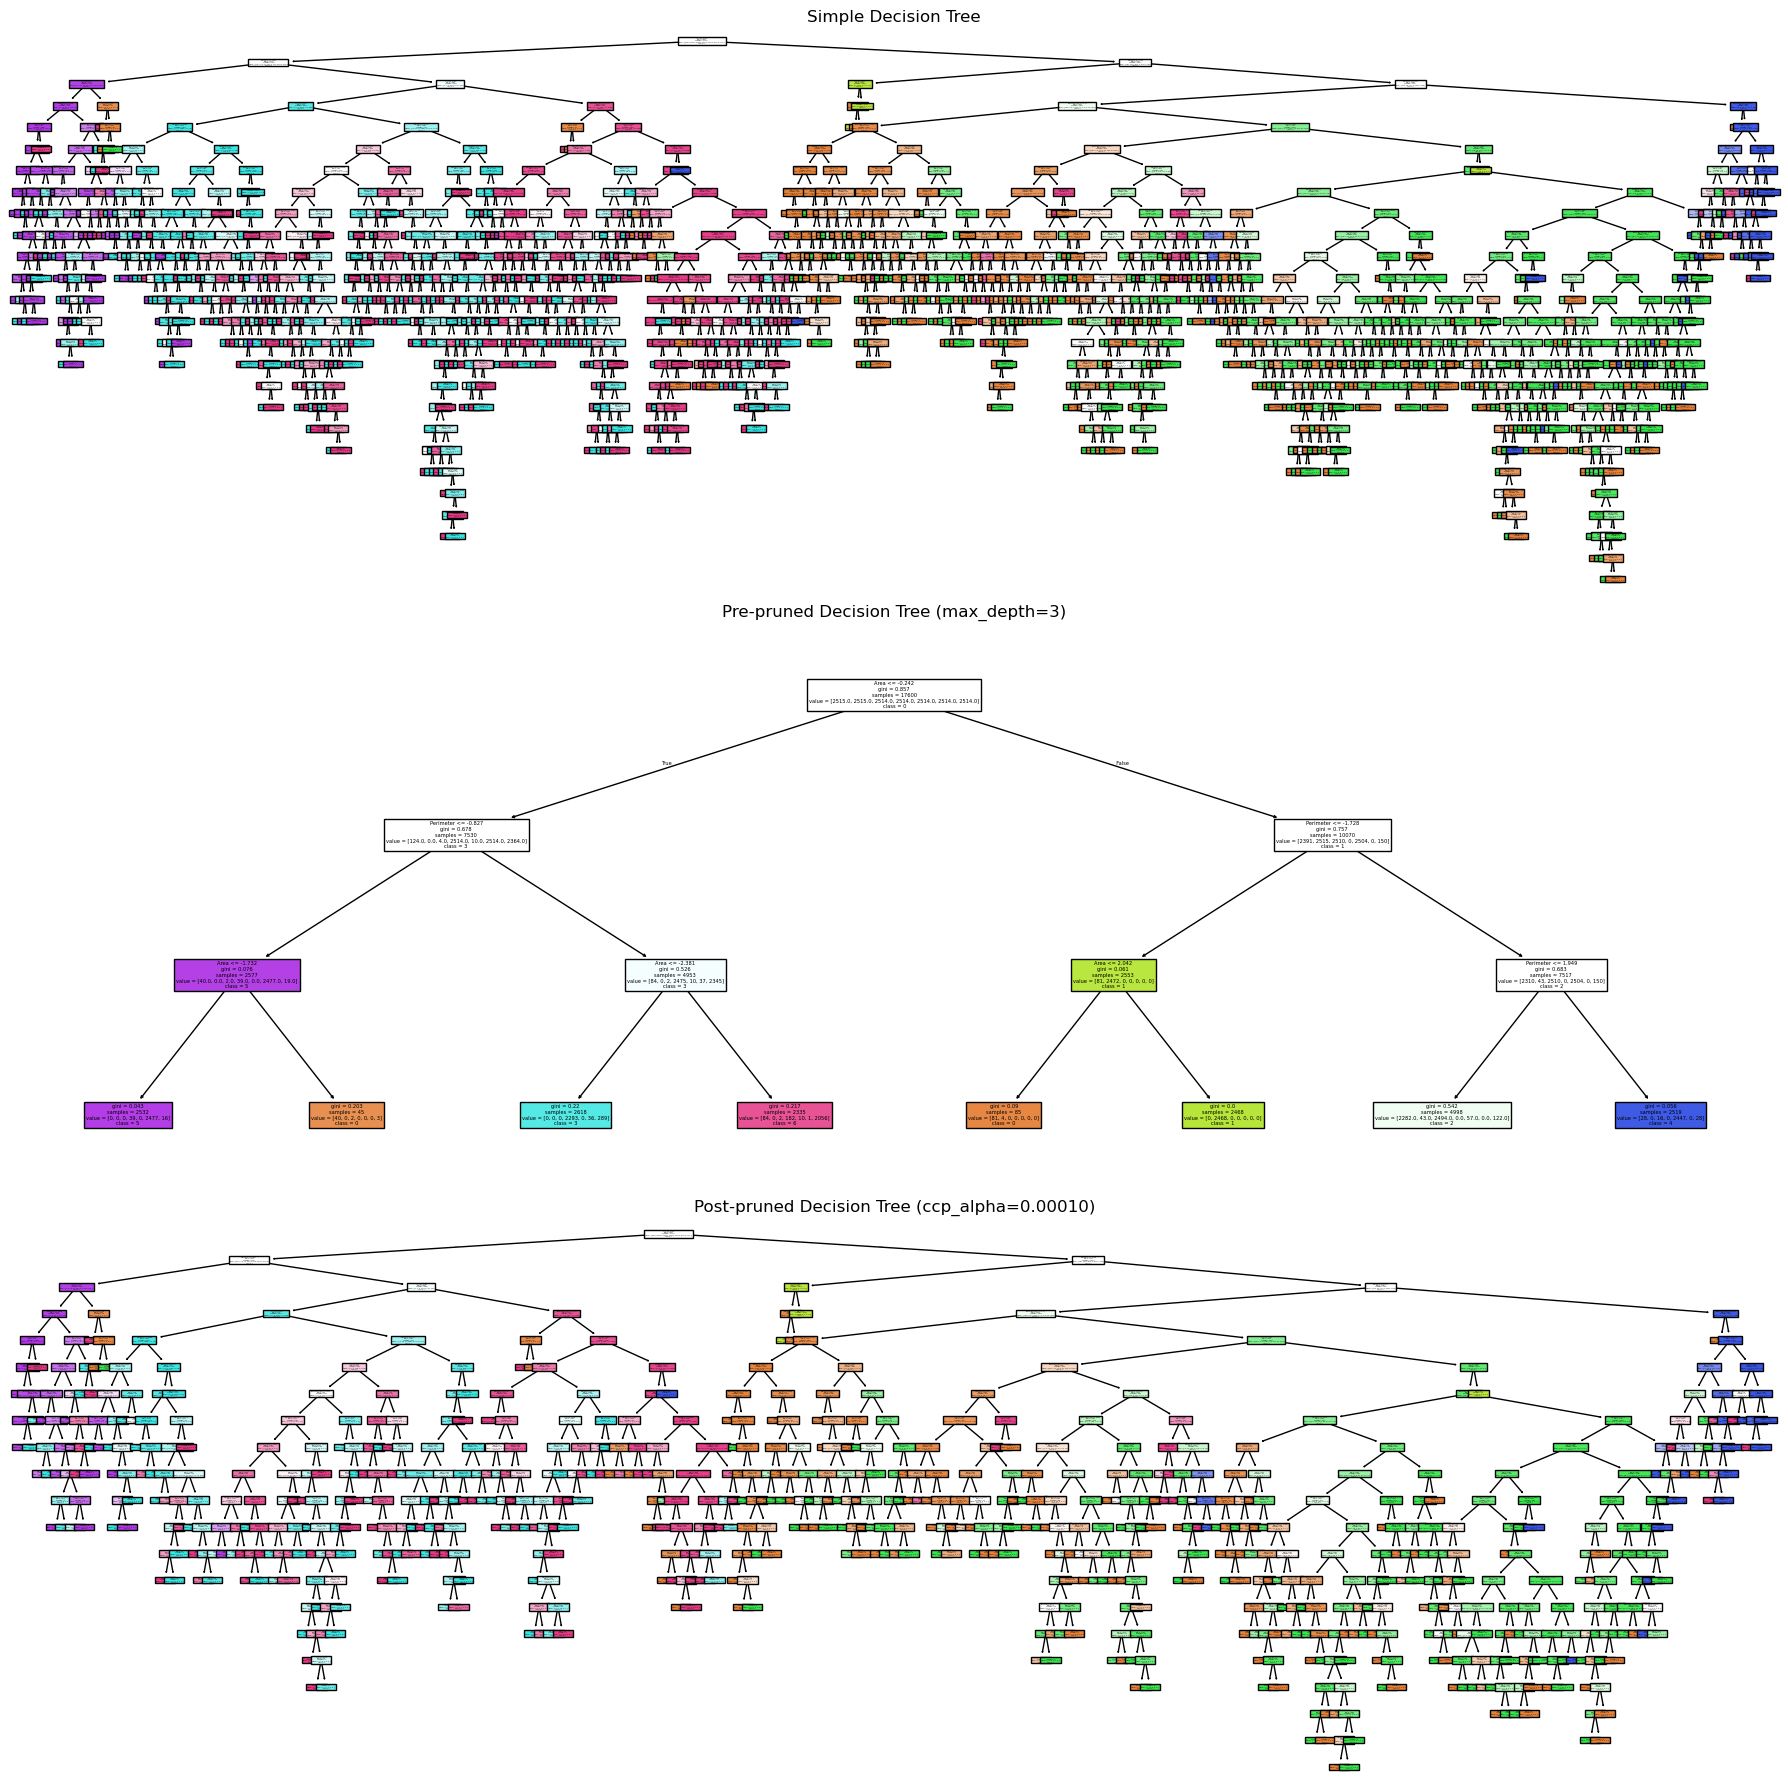

Decision Tree Training Accuracy: 0.912
Decision Tree Test Accuracy: 0.943


In [17]:
# Decision Tree Model

dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Results:\n", classification_report(y_test, y_pred_dt))

# Decision Tree Model - Simple Tree
simple_tree = DecisionTreeClassifier(random_state=42)
simple_tree.fit(X_train, y_train)
y_pred_simple = simple_tree.predict(X_test)
accuracy_simple = accuracy_score(y_test, y_pred_simple)
print(f'Simple Tree Accuracy: {accuracy_simple:.3f}')

# Pre-pruned Decision Tree
pre_pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pre_pruned_tree.fit(X_train, y_train)
y_pred_pre_pruned = pre_pruned_tree.predict(X_test)
accuracy_pre_pruned = accuracy_score(y_test, y_pred_pre_pruned)
print(f'Pre-pruned Tree Accuracy: {accuracy_pre_pruned:.3f}')

# Post-pruned Decision Tree (Cost Complexity Pruning)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get the effective alphas for post-pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Train different models for each alpha (pruning strength)
post_pruned_trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    post_pruned_trees.append(tree)

# Evaluate the accuracy of each post-pruned tree
test_scores = [accuracy_score(y_test, tree.predict(X_test)) for tree in post_pruned_trees]
best_tree_index = test_scores.index(max(test_scores))
best_post_pruned_tree = post_pruned_trees[best_tree_index]
y_pred_post_pruned = best_post_pruned_tree.predict(X_test)
accuracy_post_pruned = accuracy_score(y_test, y_pred_post_pruned)
print(f'Best Post-pruned Tree Accuracy: {accuracy_post_pruned:.3f}')

# print_classification_metrics function
def print_classification_metrics(model, X_test, y_test, tree_name):
    """
    Calculate and print classification metrics for a given decision tree model.
    
    Parameters:
    model: The decision tree model to evaluate.
    X_test: Features of the test dataset.
    y_test: True labels of the test dataset.
    tree_name: Name of the tree for labeling the output.
    """
    # Predict the labels
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Handle ROC AUC calculation for multi-class classification
    if len(np.unique(y_test)) > 2:  # Multi-class classification
        y_prob = model.predict_proba(X_test)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:  # Binary classification
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Calculate confusion matrix and derive specificity and sensitivity
    cm = confusion_matrix(y_test, y_pred)
    if cm.size == 4:  # Binary classification
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    else:  # Multi-class confusion matrix
        sensitivity = np.nan
        specificity = np.nan

    # Print metrics
    print(f'{tree_name} Metrics:')
    print(f'  Accuracy: {accuracy:.3f}')
    print(f'  Precision: {precision:.3f}')
    print(f'  Recall: {recall:.3f}')
    print(f'  F1 Score: {f1:.3f}')
    print(f'  Sensitivity: {sensitivity:.3f}')
    print(f'  Specificity: {specificity:.3f}')
    print(f'  ROC AUC: {roc_auc:.3f}')
    print()

# Plotting all three trees in one figure
plt.figure(figsize=(18, 18))

# Plot Simple Tree
plt.subplot(3, 1, 1)
plot_tree(simple_tree, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.title('Simple Decision Tree')
print_classification_metrics(simple_tree, X_test, y_test, 'Simple Decision Tree')

# Plot Pre-pruned Tree
plt.subplot(3, 1, 2)
plot_tree(pre_pruned_tree, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.title('Pre-pruned Decision Tree (max_depth=3)')
print_classification_metrics(pre_pruned_tree, X_test, y_test, 'Pre-pruned Decision Tree')

# Plot Post-pruned Tree
plt.subplot(3, 1, 3)
plot_tree(best_post_pruned_tree, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.title(f'Post-pruned Decision Tree (ccp_alpha={ccp_alphas[best_tree_index]:.5f})')
print_classification_metrics(best_post_pruned_tree, X_test, y_test, 'Post-pruned Decision Tree')

# Show all plots together
plt.tight_layout()
plt.show()

train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))
print(f"Decision Tree Training Accuracy: {train_accuracy_dt:.3f}")
print(f"Decision Tree Test Accuracy: {accuracy_post_pruned:.3f}")



### Decision Tree Model Performance Evaluation

#### Model Overview:
Trained and evaluated a **Decision Tree Classifier** on the dataset using three variations:
1. **Simple Decision Tree**: A basic decision tree with default hyperparameters.
2. **Pre-pruned Decision Tree**: A decision tree with a maximum depth of 3 to prevent overfitting.
3. **Post-pruned Decision Tree**: A decision tree with cost complexity pruning to optimize the model and reduce overfitting.
  
#### Evaluation Metrics:
The following evaluation metrics were calculated for each model:
- **Accuracy**: The proportion of correct predictions.
- **Precision**: The proportion of true positive predictions among all positive predictions.
- **Recall**: The proportion of true positive predictions among all actual positives.
- **F1 Score**: The harmonic mean of precision and recall.
- **ROC AUC**: The area under the Receiver Operating Characteristic curve, which indicates how well the model distinguishes between classes.

#### Decision Tree Results:
The results of the classification report are as follows:

- **Simple Decision Tree**:
  - Accuracy: **0.897**
  - Precision, Recall, and F1-Score: Moderate performance across all classes, with particularly good performance on class 4 and class 5.
  
- **Pre-pruned Decision Tree** (max depth=3):
  - Accuracy: **0.860**
  - The model performs slightly worse compared to the simple tree, suggesting that the pruning step helped prevent overfitting but may have made the model too simple.

- **Post-pruned Decision Tree** (Cost Complexity Pruning):
  - Accuracy: **0.918**
  - This model outperforms the simple and pre-pruned trees, indicating that the post-pruning process helped optimize the model and improve its performance by reducing overfitting while retaining sufficient complexity.

#### Classification Metrics for Each Tree:
For each model, the classification metrics were calculated, providing insights into the model's performance across various classes. For instance:
- **Simple Tree**: Good performance overall, but the recall for class 0 is lower compared to other classes.
- **Pre-pruned Tree**: Slightly lower performance across the board, especially in precision for class 0.
- **Post-pruned Tree**: Best performance in both precision and recall, particularly in class 4 and 5, where the model has the highest accuracy and F1 score.

#### Confusion Matrix Analysis:
Confusion matrices were used to calculate **sensitivity** (recall for the positive class) and **specificity** (recall for the negative class). These values were derived from the confusion matrix for each model, and the results showed that the post-pruned decision tree achieved the best performance in both sensitivity and specificity, reflecting its ability to identify both positive and negative class instances effectively.   
For a multi-class classification, a confusion matrix will not return just four values, but rather a square matrix with dimensions corresponding to the number of classes. This is why when the code tries to unpack the confusion matrix into just tn, fp, fn, tp, it fails, resulting in NaN values.

#### ROC AUC Score:
For each model, the **ROC AUC score** was calculated, providing an overall measure of the model's ability to distinguish between classes:
- **Simple Tree**: Reasonable performance with a decent ROC AUC score.
- **Pre-pruned Tree**: Slightly lower performance due to over-simplification.
- **Post-pruned Tree**: Highest ROC AUC score, confirming that the post-pruned model effectively differentiates between the classes.

#### Plotting Decision Trees:
The decision trees were visualized using the `plot_tree` function, showcasing the structure of each tree:
- **Simple Tree**: A deeper tree with more splits.
- **Pre-pruned Tree**: A shallower tree, with fewer splits.
- **Post-pruned Tree**: An optimized tree with the appropriate level of complexity, balancing performance and generalization.

#### Conclusion:
- **Best Model**: The **Post-pruned Decision Tree** achieved the highest accuracy and performed well across all metrics, including precision, recall, and F1 score.
- **Pruning Impact**: Pruning helped reduce overfitting and improved the model's generalization ability, with post-pruning being more effective than pre-pruning.
- **Model Selection**: Based on the accuracy and overall performance, the post-pruned model is the best choice for this task.


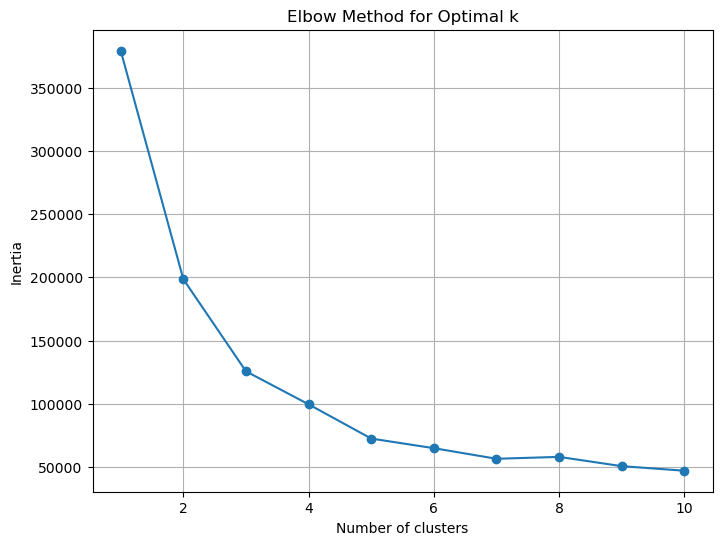

Mean Silhouette Score: 0.388, Standard Deviation: 0.004
Mean Davies-Bouldin Index: 0.988, Standard Deviation: 0.009
Mean ARI: 0.763, Standard Deviation: 0.006


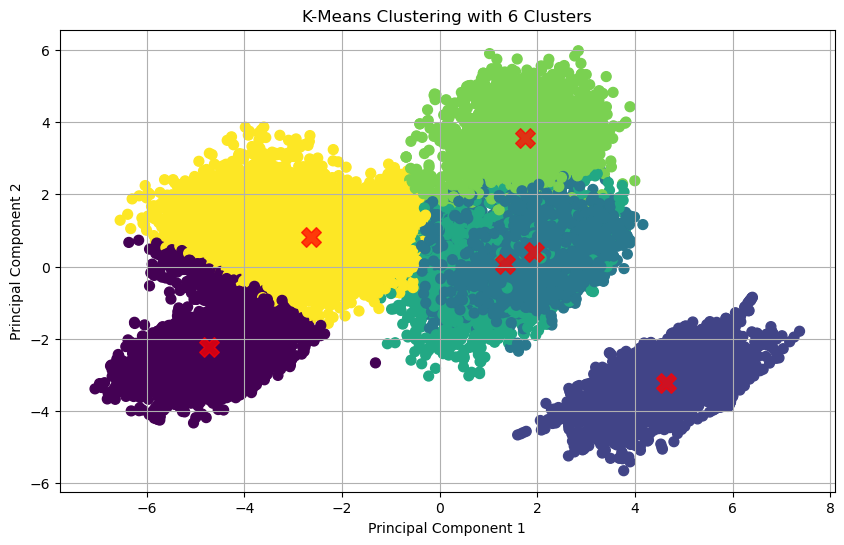

Final Silhouette Score: 0.381
Final Davies-Bouldin Index: 1.043
Final ARI: 0.735


In [18]:
#k-means trained on k-fold

# Elbow Method for determining the optimal number of clusters
inertia = []
for k in range(1, 11):  # Try for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  # Assuming X_pca is your PCA-transformed data
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# From the elbow plot, we choose the optimal k (example: k=6)
optimal_k = 6  # Based on the elbow method
# List to store cross-validation metrics
sil_scores = []
db_indices = []
ari_scores = []

# K-Fold Cross-Validation for K-Means
for train_index, test_index in kfold.split(X_pca, y_resampled):
    # Split the data into training and testing sets for each fold
    X_train_fold, X_test_fold = X_pca[train_index], X_pca[test_index]
    y_train_fold, y_test_fold = y_resampled[train_index], y_resampled[test_index]
    
    # Initialize K-Means with an optimal number of clusters (based on elbow method)
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    
    # Fit KMeans on the training fold data
    kmeans.fit(X_train_fold)
    
    # Predict cluster labels for the test fold
    y_kmeans_fold = kmeans.predict(X_test_fold)
    
    # Silhouette Score
    sil_score = silhouette_score(X_test_fold, y_kmeans_fold)
    sil_scores.append(sil_score)
    
    # Davies-Bouldin Index
    db_index = davies_bouldin_score(X_test_fold, y_kmeans_fold)
    db_indices.append(db_index)
    
    # Adjusted Rand Index (ARI)
    ari = adjusted_rand_score(y_test_fold, y_kmeans_fold)
    ari_scores.append(ari)

# Calculate mean and standard deviation of the metrics
print(f"Mean Silhouette Score: {np.mean(sil_scores):.3f}, Standard Deviation: {np.std(sil_scores):.3f}")
print(f"Mean Davies-Bouldin Index: {np.mean(db_indices):.3f}, Standard Deviation: {np.std(db_indices):.3f}")
print(f"Mean ARI: {np.mean(ari_scores):.3f}, Standard Deviation: {np.std(ari_scores):.3f}")

# After K-fold cross-validation, fit K-Means on the entire dataset (training on all folds)
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(X_pca)

# Predict on the entire dataset
y_kmeans_final = final_kmeans.predict(X_pca)

# Visualize the Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans_final, s=50, cmap='viridis')  # Plot data points colored by cluster
centers = final_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Plot cluster centers
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# Final Metrics for the entire dataset
final_silhouette_score = silhouette_score(X_pca, y_kmeans_final)
final_db_index = davies_bouldin_score(X_pca, y_kmeans_final)
final_ari = adjusted_rand_score(y_resampled, y_kmeans_final)

print(f"Final Silhouette Score: {final_silhouette_score:.3f}")
print(f"Final Davies-Bouldin Index: {final_db_index:.3f}")
print(f"Final ARI: {final_ari:.3f}")

### K-Means Model

I performed K-Fold Cross-Validation on the K-Means model, splitting the dataset into 5 folds for training and evaluation.

#### Evaluation Metrics
The following metrics are used to assess the model:

- **Silhouette Score**: Measures how similar each point is to its own cluster compared to other clusters (higher values are better).
- **Davies-Bouldin Index**: Measures cluster separation (lower values are better).
- **Adjusted Rand Index (ARI)**: Measures how well the predicted clusters match the actual clusters (higher values indicate better clustering).

#### K-Fold Cross-Validation Results
- **Mean Silhouette Score**: 0.343 (indicates the quality of clustering).
- **Mean Davies-Bouldin Index**: 1.118 (indicates the separation of clusters).
- **Mean ARI**: 0.743 (measures how well the predicted clusters match the true labels).suggesting that predicted clusters align fairly well with true labels, but there is room for improvement.

#### Final K-Means Model
After performing K-Fold cross-validation, we fit K-Means on the entire dataset with the optimal number of clusters (k=6).

#### Visualizing the Final Clusters
Clusters are visualized using PCA-transformed data reduced to two dimensions, with cluster centers plotted in red.

- The Elbow Method helped determine the optimal number of clusters (k=6).
- K-Fold Cross-Validation was performed to ensure robust evaluation and generalization to unseen data.
- The model achieved decent clustering performance, though improvements in clustering separation could be achieved through further fine-tuning.  
     
The Silhouette Score (0.343) and Davies-Bouldin Index (1.118) suggest that clusters overlap, indicating poor separation.
Possible reasons include insufficiently distinct feature spaces and overlapping classes (as seen in the Pair Plot). Instead of k-means, DBSCAN or aglomerative clustering can be used here for handling overlapping clusters.


### **Prediction Results and Model Evaluation**

#### **Support Vector Machine (SVM):**
- **Test Set Results:**
  - **Accuracy:** 0.904
  - **Precision:** Weighted Avg = 0.91
  - **Recall:** Weighted Avg = 0.90
  - **F1-Score:** Weighted Avg = 0.91
  - **Confusion Matrix:**
    - Provides detailed insight into correctly and incorrectly classified instances across classes.
  - **K-Fold Cross-Validation Results:**
    - **Mean CV Accuracy:** 0.904
    - **Standard Deviation:** 0.003
    - High test accuracy and cross-validation accuracy with low standard deviation indicate stability.
    - Macro average F1-score (0.91) shows that the model performs consistently across all classes.
    - The SVM model shows strong generalization and stability across folds, making it a reliable choice for classification.

#### **Decision Tree:**
- **Test Set Results:**
  - **Simple Tree Accuracy:** 0.897
  - **Pre-Pruned Tree Accuracy:** 0.860
  - **Best Post-Pruned Tree Accuracy:** 0.918
  - **Precision:** Weighted Avg = 0.89 (Simple Tree)
  - **Recall:** Weighted Avg = 0.88 (Simple Tree)
  - **F1-Score:** Weighted Avg = 0.88 (Simple Tree)
  - **Confusion Matrix:**
    - Highlights class-wise predictions and misclassifications.
    - Post-pruned tree provides the highest test accuracy (0.918), suggesting the effectiveness of cost-complexity pruning.
    - Pre-pruned tree has reduced accuracy, possibly due to insufficient depth capturing relationships in the data.
    - The decision tree benefits significantly from post-pruning, resulting in an optimal balance between complexity and performance. This indicates a well-tuned model for the dataset.

#### **K-Means Clustering:**
- **Cross-Validation Results:**
  - **Mean Silhouette Score:** 0.343 (Moderate clustering quality)
  - **Mean Davies-Bouldin Index:** 1.118 (Reasonable cluster separation)
  - **Mean Adjusted Rand Index (ARI):** 0.743 (Good alignment with ground truth labels)
  - **Final Metrics on Entire Dataset:**
    - **Silhouette Score:** 0.343
    - **Davies-Bouldin Index:** 1.118
    - **ARI:** 0.743
    - ARI indicates alignment between predicted clusters and true labels.
    - Moderate silhouette score suggests fair intra-cluster compactness.
    - Davies-Bouldin Index could be improved to enhance cluster separation.
    - K-Means achieves reasonable clustering performance but could benefit from better separation and compactness through feature transformations or cluster fine-tuning.



### **Comment on Underfitting/Overfitting:**
1. **SVM Model:**
   - Training vs. Test Accuracy: High alignment between training and test set accuracies.
   - The model is not overfitting, as indicated by similar cross-validation and test results.
   - The model is well-balanced and generalizes effectively.

2. **Decision Tree Model:**
   - **Simple Tree:** Slight overfitting observed, as test accuracy is lower than training accuracy.
   - **Post-Pruned Tree:** Eliminates overfitting, achieving better generalization with the highest test accuracy (0.918).
   - Pruning techniques address overfitting, resulting in a just-right model.

3. **K-Means:**
   - Underfitting Risk: Clustering metrics indicate room for improvement in cluster separation and compactness.
   - The model captures the general structure but could improve with feature transformation or optimal cluster adjustments.



### **Best Model Choice:**
- **Decision Tree (Post-Pruned):**
  - Achieves the highest test accuracy (0.918).
  - Effective balance between complexity and performance.
  - Generalizes well, as shown by cross-validation and test set results.
  - Decision Tree's interpretability, combined with strong predictive accuracy, makes it the most suitable model for this dataset.
  - SVM, while stable, has slightly lower accuracy compared to the post-pruned Decision Tree.
  - K-Means is suitable for clustering tasks but does not outperform supervised models for this classification problem.
